# Os efeitos da pandemia e mudança de governos sobre o preço de combustível 

Neste notebook, iremos analizar como a pandemia e a mudança de governo impactaram no preço do combustível.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import clear_output as cls
import time
import seaborn as sb
from sklearn.cluster import KMeans

# Ações PETR3

In [147]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")

- Analisando as medidas de centralidade e dispersão das variáveis disponíveis

In [4]:
print("Dados de máxima: ")
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Dados de máxima: 
Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [5]:
print("Dados de mínima: ")
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Dados de mínima: 
Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


Aqui, observamos a relação entre os valores máximos e mínimos das ações

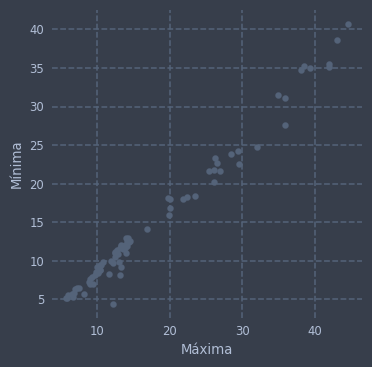

In [6]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

Relação entre o volume e os mínimos das ações

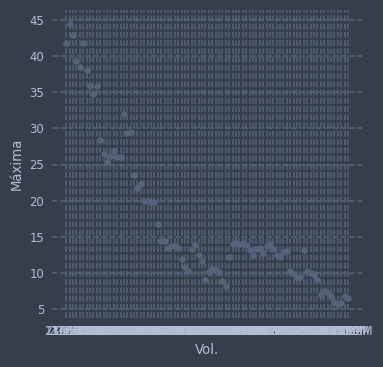

In [7]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

Relação entre os valores máximos e variancia das ações

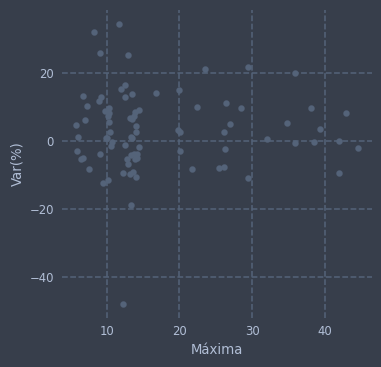

In [8]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [9]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [10]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


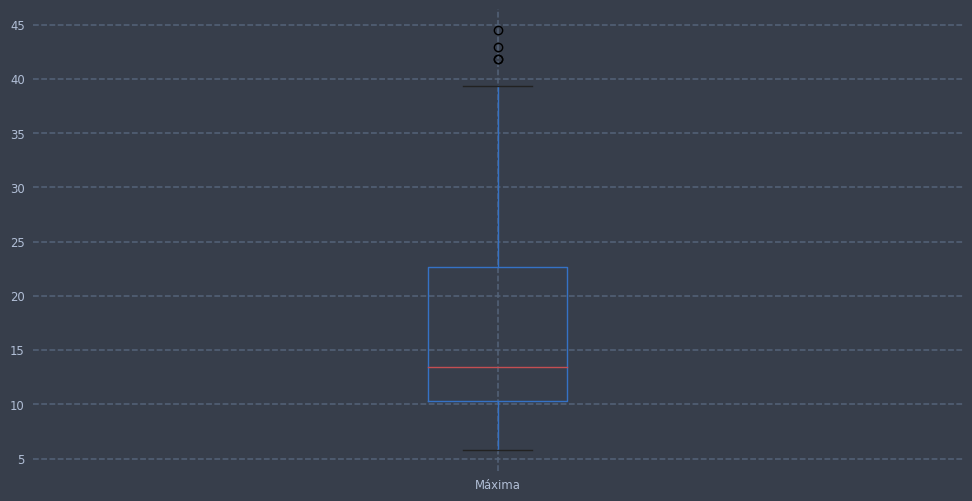

In [11]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

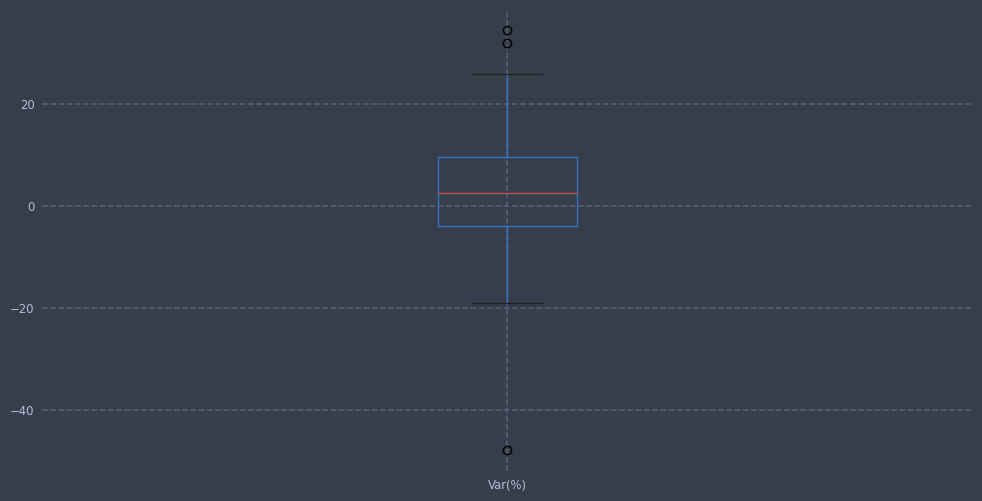

In [12]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

# IDH


In [13]:
#Lendo os dados da base
dataIdh = pd.read_csv("arquivos/IDH/2017-2021_idh.csv")

#Printando informações dos dados (Variancia, média, quartis, etc...)
print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())

var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


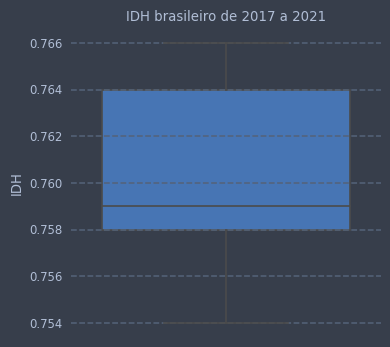

In [14]:
#Boxplot dos dados de referentes a IDH de 2017 a 2021
idhBox = sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

plt.ylabel("IDH")

plt.show(idhBox)

Podemos ver abaixo, como o IDH do Brasil se alterou com o tempo que a pandemia passou

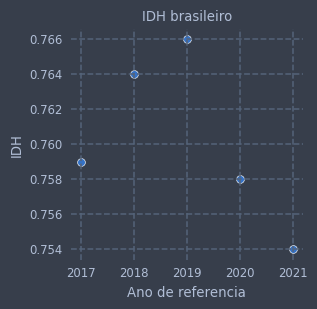

In [15]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(3,3))

#Criando gráfico de disperção com base nos anos e valores de idh
dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo títulos do gráfico
dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

#Exibindo o gráfico
plt.show()

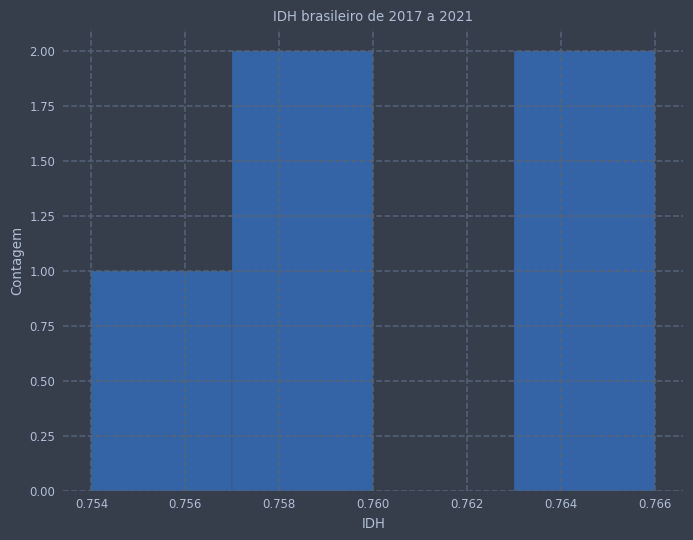

In [16]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Histograma dados dados de IDH entre 2017 e 2021
histIdh = sb.histplot(dataIdh, x='idh').set_title("IDH brasileiro de 2017 a 2021")

#Mudando o título dos eixos
plt.xlabel("IDH")
plt.ylabel("Contagem")

#Plotando os gráficos
plt.show()

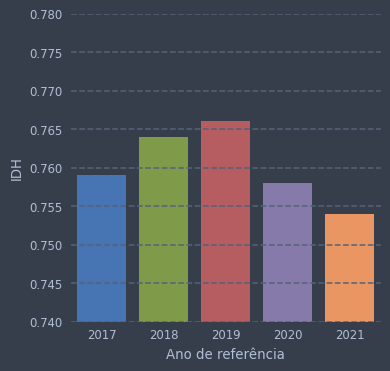

In [17]:
#Criando gráfico de barras com os dados de IDH ao longo dos anos
idhBar = sb.barplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo intervalo de valores do eixo y mostrado no gráfico
eixo = plt.gca()
eixo.set_ylim([0.74, 0.78])

#Alterando títulos dos eixos
plt.xlabel("Ano de referência")
plt.ylabel("IDH")

#Exibindo o gráfico
plt.show()

Abaixo, como o IDH de cada estado se comportou ao longo dos anos de pandemia

In [18]:
#Lendo os dados da base
dataIdhReg = pd.read_csv("arquivos/IDH/2017-2021_BRASIL-GDL-Subnational-HDI-data.csv")
dataIdhReg = dataIdhReg.drop(0) # removendo linha que informa o total

describe_IDHReg = dataIdhReg.describe() # ciando um dataframe com algumas infos do dataset

describe_IDHReg.loc[len(describe_IDHReg)] = dataIdhReg.var(numeric_only=True) # adicionando uma linha com informções de variância
describe_IDHReg = describe_IDHReg.rename(index={8: "var"}) # renomeando a linha que foi criada

# mostrando as infos do dataset
describe_IDHReg

,2017,2018,2019,2020,2021
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.749000,0.753963,0.756074,0.747889,0.744074
std,0.026932,0.027016,0.027357,0.027040,0.026899
min,0.703000,0.708000,0.709000,0.702000,0.698000
25%,0.732500,0.737500,0.739500,0.731500,0.727500
50%,0.748000,0.753000,0.755000,0.746000,0.743000
75%,0.764000,0.769000,0.771000,0.763000,0.759000
max,0.821000,0.826000,0.829000,0.820000,0.816000
var,0.000725,0.000730,0.000748,0.000731,0.000724


Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

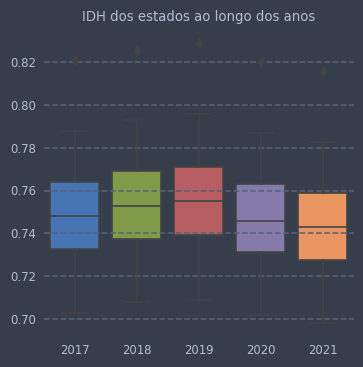

In [19]:
#Boxplot dos dados de IDH ao longo dos anos
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

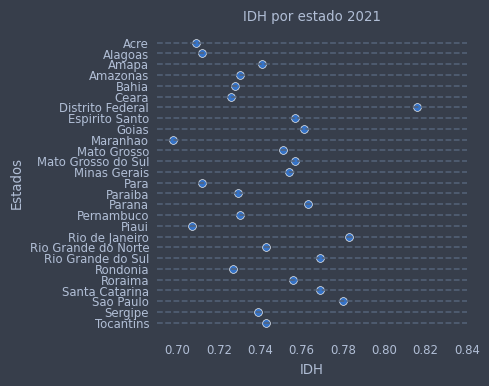

In [20]:
#Plotando gráficos de disperção dos dados de IDH dos estados brasileiros a cada ano entre 2017 e 2021
for cln in dataIdhReg:
    
    #Clear
    cls(wait=True)
    
    #If para ignorar coluna com os estados
    if cln == "Region": continue 

    #Criando gráfico de disperção para todos os estados a cada ano
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')
    
    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando os gráficos com linhas no eixo 
    plt.grid(axis='x')
    plt.show()

    time.sleep(1)
    

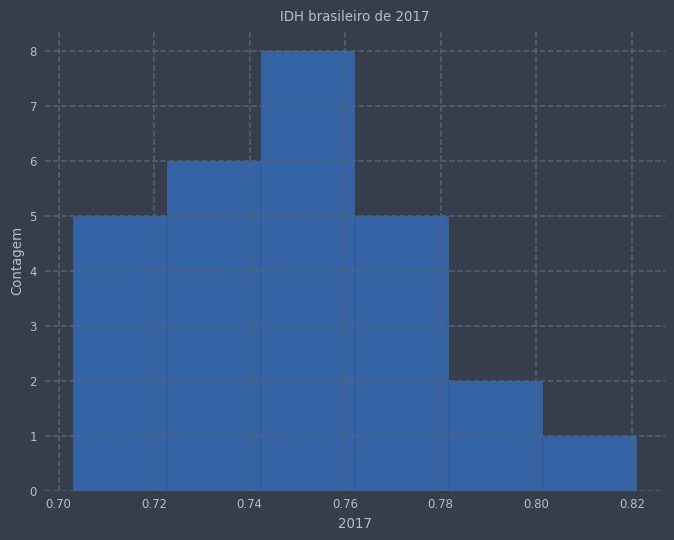

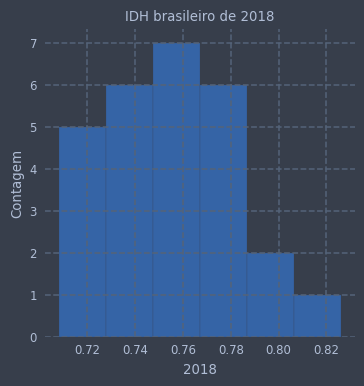

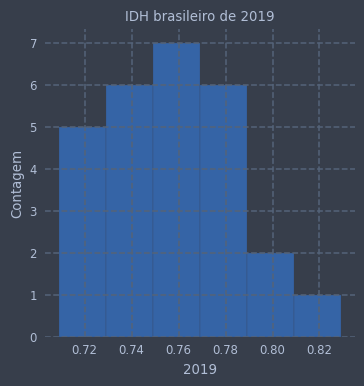

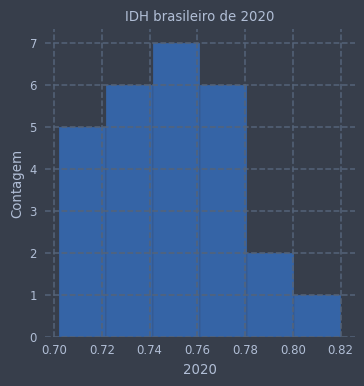

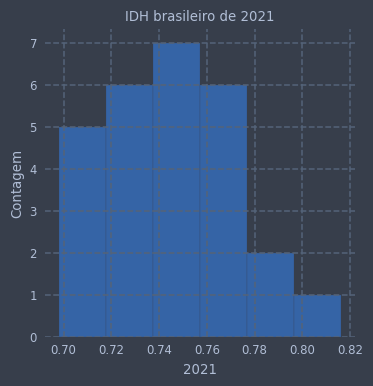

In [21]:
#Definindo o tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Plotando histogramas dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    histIdh = sb.histplot(dataIdhReg, x=cln).set_title(f"IDH brasileiro de {cln}")
    
    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando gráfico
    plt.show()

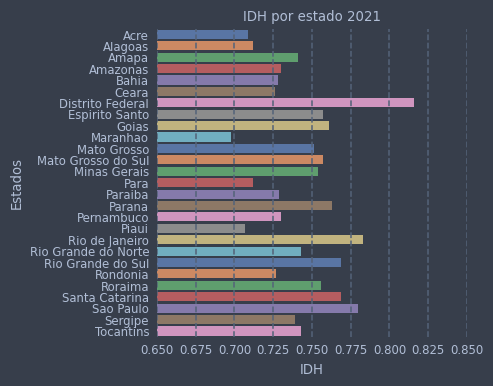

In [22]:
#Plotando gráficos de barra dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    cls(wait=True)
    time.sleep(1)
    if cln == "Region": continue
    dispersaoIdh = sb.barplot(data=dataIdhReg, x=cln, y='Region', palette="deep")
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')

    #Definindo intervalo de valores do eixo x a ser exibido no gráfico
    eixo = plt.gca()
    eixo.set_xlim([0.65, 0.85])

    #Exibindo gráfico
    plt.show()

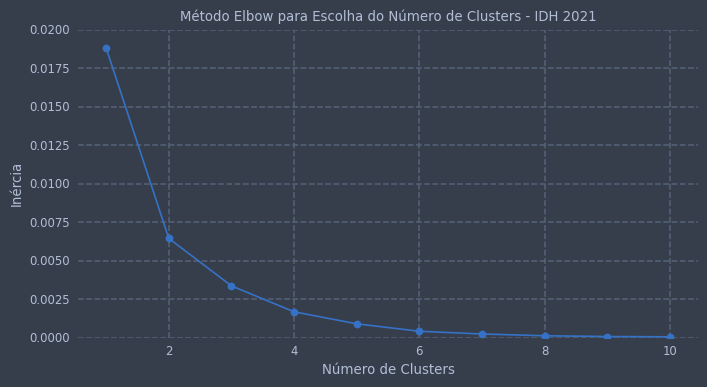

In [23]:
# Escolha do número de clusters usando o método Elbow

#Separando colunas que serão usadas
idhCluster = dataIdhReg[["2017", "2018", "2019", "2020", "2021"]]

for cln in idhCluster:
    cls(wait=True)
    time.sleep(1)
    #Definindo array para dados do algoritmo Kmeans
    inertia = []
    
    for i in range(1, 11):
        #Definindo parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(idhCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.ylim(0,0.02)
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IDH {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()


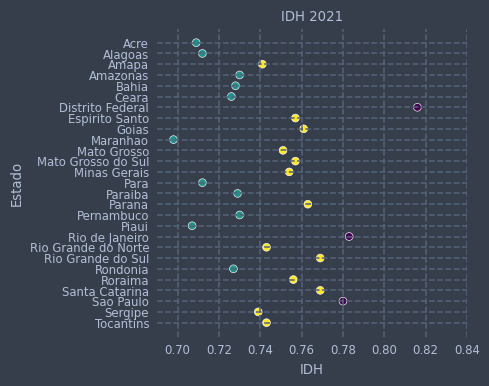

In [24]:
#Número de clusters definido pelo método Elbow
nCluster = 3

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in idhCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada ano
    kmeans.fit(idhCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeans
    dispersaoIdhCluster = sb.scatterplot(data = dataIdhReg, x = cln, y = 'Region', c = kmeans.labels_)
    dispersaoIdhCluster.set_title(f'IDH {cln}')
    dispersaoIdhCluster.set_xlabel("IDH")
    dispersaoIdhCluster.set_ylabel('Estado')

    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando gráficos
    plt.show()
    time.sleep(1)

# Preço Combustível

In [314]:
preco_comb_2016_18 = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2016-a-2018.csv")
preco_comb_2019_21 = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2019-a-2021.csv")
preco_comb_2022_24 = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal_municipios-desde_jan2022_a_2024.csv")

# iremos trabalhar apenas com o preço da gasolina comum
# separando apenas as colunas que iremos trabalhar
preco_gas_2016_18 = preco_comb_2016_18[preco_comb_2016_18["PRODUTO"] == "GASOLINA COMUM"][["MÊS", "PRODUTO", "PREÇO MÉDIO REVENDA"]]
preco_gas_2019_21 = preco_comb_2019_21[preco_comb_2019_21["PRODUTO"] == "GASOLINA COMUM"][["MÊS", "PRODUTO", "PREÇO MÉDIO REVENDA"]]
preco_gas_2022_24 = preco_comb_2022_24[preco_comb_2022_24["PRODUTO"] == "GASOLINA COMUM"][["MÊS", "PRODUTO", "PREÇO MÉDIO REVENDA"]]

# transformando para o tipo data
preco_gas_2016_18["MÊS"] = pd.to_datetime(preco_gas_2016_18["MÊS"])
preco_gas_2019_21["MÊS"] = pd.to_datetime(preco_gas_2019_21["MÊS"])
preco_gas_2022_24["MÊS"] = pd.to_datetime(preco_gas_2022_24["MÊS"])

In [360]:
# fazendo a média mensal
preco_gas_2016_18_media_mensal = preco_gas_2016_18.groupby("MÊS")["PREÇO MÉDIO REVENDA"].agg('mean').reset_index().rename(columns={"PREÇO MÉDIO REVENDA": "PREÇO MÉDIO REVENDA MENSAL"})

preco_gas_2019_21_media_mensal = preco_gas_2019_21.groupby("MÊS")["PREÇO MÉDIO REVENDA"].agg('mean').reset_index().rename(columns={"PREÇO MÉDIO REVENDA": "PREÇO MÉDIO REVENDA MENSAL"})

preco_gas_2022_24_media_mensal = preco_gas_2022_24.groupby("MÊS")["PREÇO MÉDIO REVENDA"].agg('mean').reset_index().rename(columns={"PREÇO MÉDIO REVENDA": "PREÇO MÉDIO REVENDA MENSAL"})


In [370]:
preco_gas_2016_24 = pd.concat([preco_gas_2016_18_media_mensal, preco_gas_2019_21_media_mensal, preco_gas_2022_24_media_mensal])
mes = pd.to_datetime('2017-04-01')
preco_gas_2017_24 = preco_gas_2016_24.loc[preco_gas_2016_24["MÊS"] >= mes].reset_index(drop='index')

In [371]:
petr3_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var(%)
0,01.March.2024,37.36,41.38,41.86,35.50,13.95M,-9.36
1,01.February.2024,41.22,42.60,44.50,40.74,216.23M,-2.23
2,01.January.2024,42.16,39.00,42.93,38.59,204.82M,8.16
3,01.December.2023,38.98,37.60,39.33,35.06,178.38M,3.40
4,01.November.2023,37.70,36.68,38.51,35.22,239.96M,-0.37
...,...,...,...,...,...,...,...
79,01.August.2017,5.78,5.68,6.06,5.53,180.60M,1.23
80,01.July.2017,5.71,5.48,5.77,5.16,123.75M,4.55
81,01.June.2017,5.46,5.72,5.86,5.24,179.96M,-3.08
82,01.May.2017,5.64,5.96,6.77,5.34,251.19M,-5.15


In [398]:
novodf = pd.DataFrame()
novodf["PREÇO MÉDIO REVENDA MENSAL"] = preco_gas_2017_24["PREÇO MÉDIO REVENDA MENSAL"]
novodf["Último"] = petr3_df["Último"].iloc[::-1].reset_index(drop=True)

In [399]:
novodf

,PREÇO MÉDIO REVENDA MENSAL,Último
0,3.729808,5.94
1,3.713365,5.64
2,3.655447,5.46
3,3.654635,5.71
4,3.873272,5.78
...,...,...
77,5.799498,37.89
78,5.709389,37.84
79,5.663917,37.70
80,5.637199,38.98


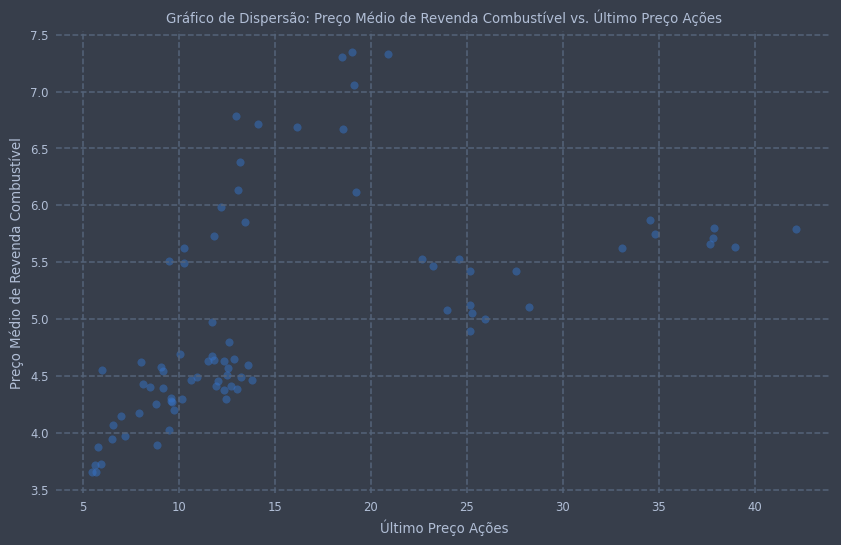

In [400]:
plt.figure(figsize=(10, 6))
plt.scatter(novodf["Último"], novodf["PREÇO MÉDIO REVENDA MENSAL"], alpha=0.5)

plt.title('Gráfico de Dispersão: Preço Médio de Revenda Combustível vs. Último Preço Ações')
plt.xlabel('Último Preço Ações')
plt.ylabel('Preço Médio de Revenda Combustível')

plt.grid(True)
plt.show()

# IPCA

In [212]:
#Criando dataframe pra receber dados do ipca de cada mes dos anos de 2017 a 2021
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

#criando tupla com todos os meses do ano
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
        "Novembro", "Dezembro")

#atribuindo os meses do ano à coluna "Mes"
for mes in meses:
    dataIpcaMedio = dataIpcaMedio._append({"Mes": mes}, ignore_index=True)

#For's para percorrer os arquivos com os dados
for j in range(17, 24): #For para os dados dos anos 2017 a 2023

    for i in range(1, 13): #For para os dados do mes de Janeiro a Dezembro

        dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i:02}Subitem.csv")
        
        #Atribuição dos dados ao dataframe
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

# tratando os tipos
dataIpcaMedio = dataIpcaMedio.astype("float64", errors="ignore")
dataIpcaMedio

,Mes,2017,2018,2019,2020,2021,2022,2023
0,Janeiro,0.38,0.29,0.32,0.21,0.25,0.54,0.53
1,Fevereiro,0.33,0.32,0.43,0.25,0.86,1.01,0.84
2,Março,0.25,0.09,0.75,0.07,0.93,1.62,0.71
3,Abril,0.14,0.22,0.57,-0.31,0.31,1.06,0.61
4,Maio,0.31,0.40,0.13,-0.38,0.83,0.47,0.23
5,Junho,-0.23,1.26,0.01,0.26,0.53,0.67,-0.08
6,Julho,0.24,0.33,0.19,0.36,0.96,-0.68,0.12
7,Agosto,0.19,-0.09,0.11,0.24,0.87,-0.36,0.23
8,Setembro,0.16,0.48,-0.04,0.64,1.16,-0.29,0.26
9,Outubro,0.42,0.45,0.10,0.86,1.25,0.59,0.24


In [214]:
#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
desc_ipcaMedio = dataIpcaMedio.describe()
desc_ipcaMedio.loc[len(desc_ipcaMedio)] = dataIpcaMedio.var(numeric_only=True, axis=0)
desc_ipcaMedio = desc_ipcaMedio.rename(index={8: "var"})
desc_ipcaMedio

,2017,2018,2019,2020,2021,2022,2023
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.242500,0.307500,0.352500,0.370000,0.802500,0.471667,0.377500
std,0.177463,0.365864,0.349418,0.497978,0.305529,0.649235,0.269077
min,-0.230000,-0.210000,-0.040000,-0.380000,0.250000,-0.680000,-0.080000
25%,0.182500,0.135000,0.107500,0.175000,0.680000,0.235000,0.230000
50%,0.265000,0.305000,0.255000,0.255000,0.865000,0.565000,0.270000
75%,0.342500,0.412500,0.525000,0.695000,0.952500,0.755000,0.572500
max,0.440000,1.260000,1.150000,1.350000,1.250000,1.620000,0.840000
var,0.031493,0.133857,0.122093,0.247982,0.093348,0.421506,0.072402


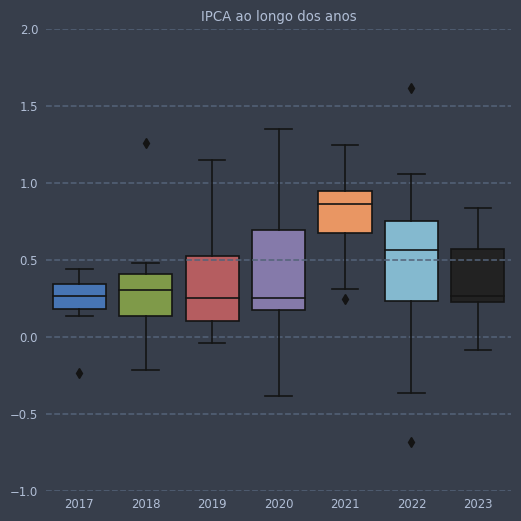

In [244]:
#Boxplot dos dados de IPCA ao longo dos anos de 2017 a 2021
plt.figure(figsize=(6,6))
plot = sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')
plt.ylim(-1, 2)
plt.show()

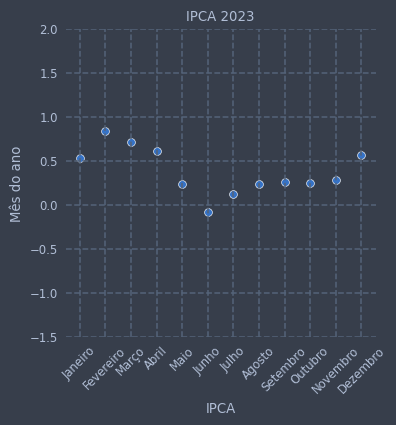

In [216]:
#Gráficos de disperção dos dados de IPCA por mes de cada ano entre 2017 e 2021
for cln in dataIpcaMedio:
    cls(wait=True)
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x='Mes', y=cln)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    plt.show()
    time.sleep(1)

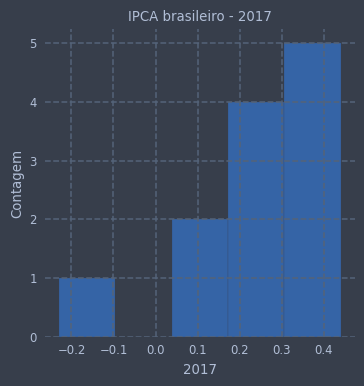

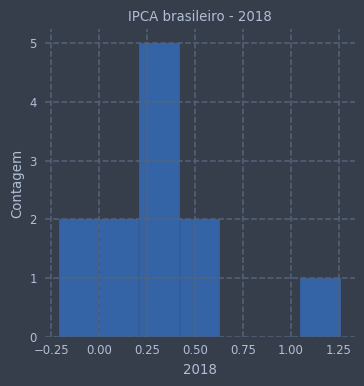

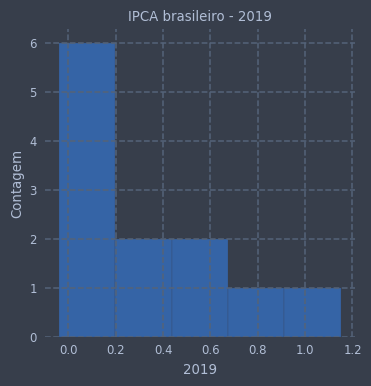

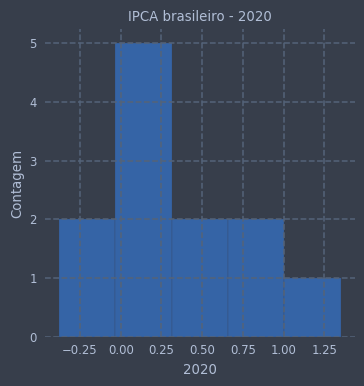

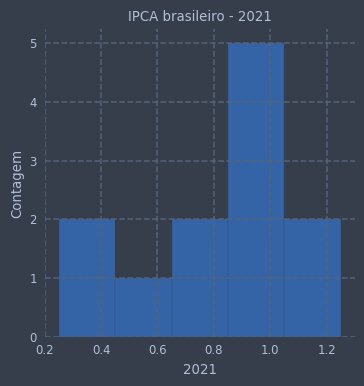

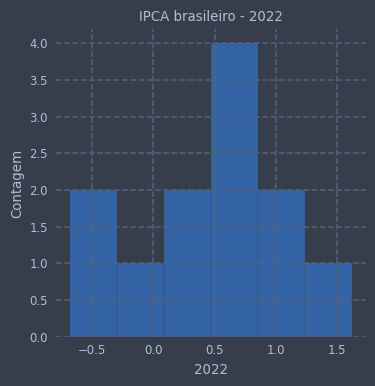

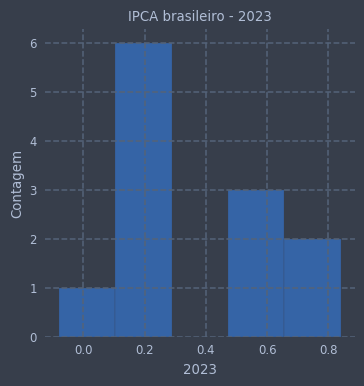

In [217]:
#Histogramas dos dados de IPCA por ano
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.histplot(dataIpcaMedio, x=cln).set_title(f"IPCA brasileiro - {cln}")

    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando o gráfico
    plt.show()

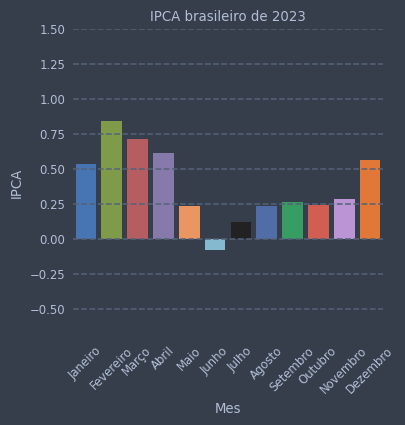

In [218]:
#Gráficos de barra dos dados de IPCA por mês ao longo dos anos entre 2017 e 2021
for cln in dataIpcaMedio:
    cls(wait=True)
    time.sleep(1)
    if cln == "Mes": continue
    histIpca = sb.barplot(dataIpcaMedio, x='Mes', y=cln).set_title(f"IPCA brasileiro de {cln}")

    #Mudando nome do eixo y
    plt.ylabel("IPCA")

    #Rotacionando os títulos do eixo x
    plt.xticks(rotation=45)
    plt.ylim(-0.7,1.5)

    #Exibindo gráficos
    plt.show()

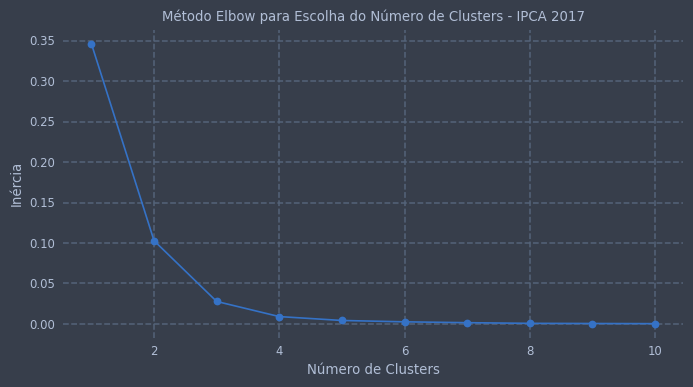

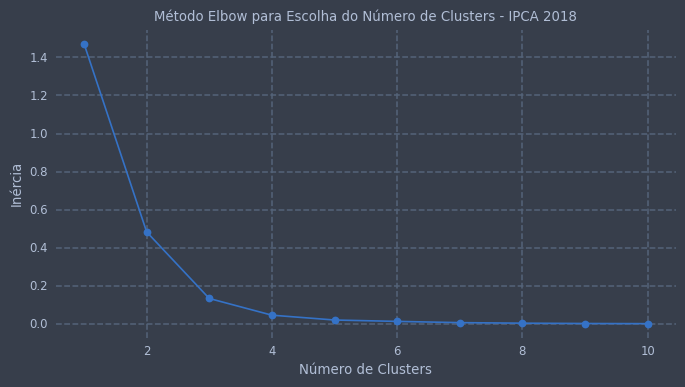

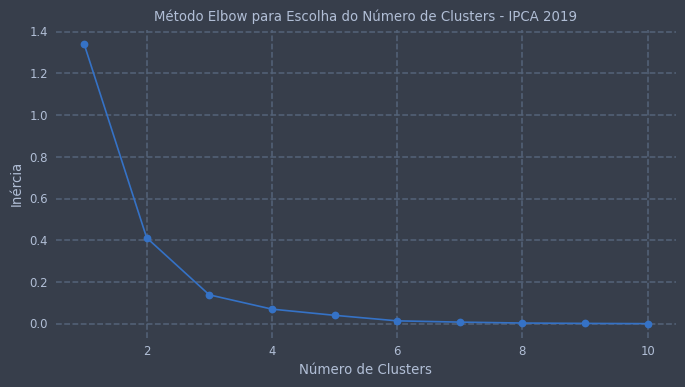

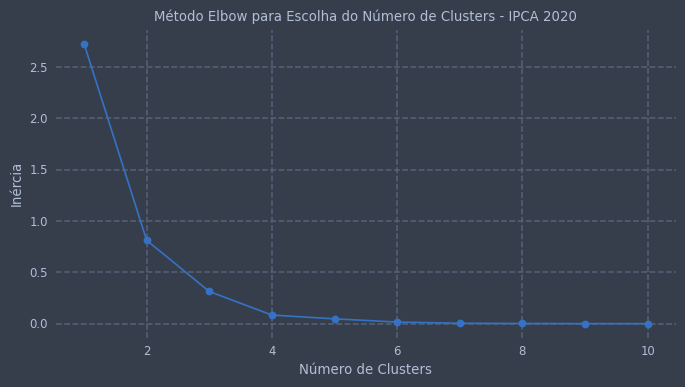

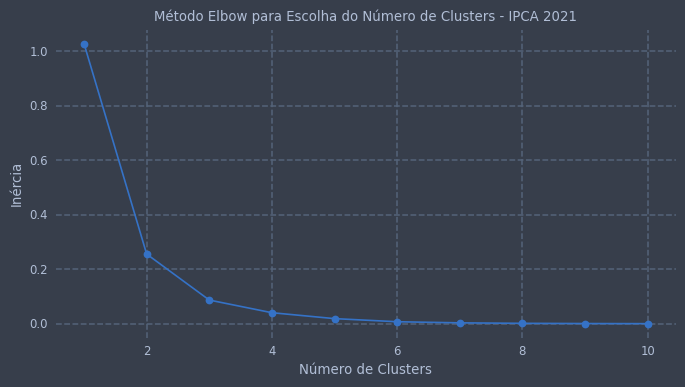

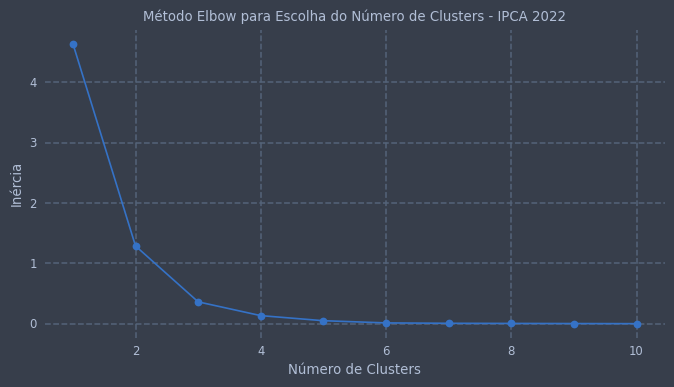

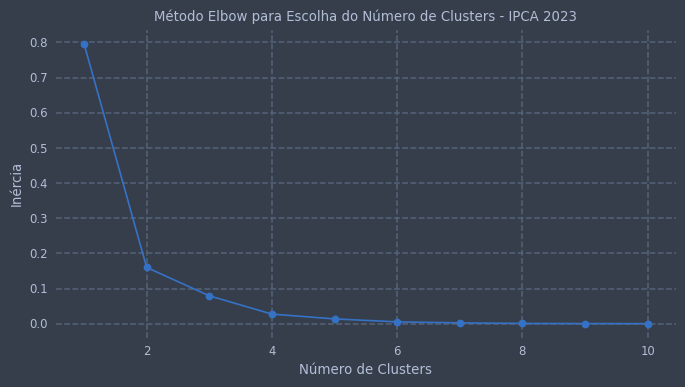

In [224]:
# Escolha do número de clusters usando o método Elbow

#Separando as colunas do dataset que serão usadas
ipcaCluster = dataIpcaMedio[["2017", "2018", "2019", "2020", "2021", "2022", "2023"]]

for cln in ipcaCluster:
    #Criando vetor para armazenar informações do kmeans
    inertia = []

    for i in range(1, 11):
        #Passando os parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(ipcaCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IPCA {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()



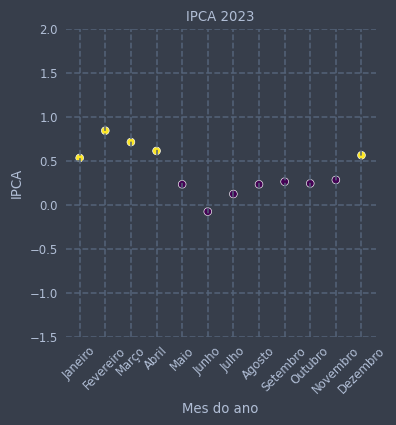

In [225]:
#Número de clusters definido pelo método Elbow
nCluster = 2

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in ipcaCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada gráfico
    kmeans.fit(ipcaCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeasn
    dispersaoIpca = sb.scatterplot(data = dataIpcaMedio, x = "Mes", y = cln, c = kmeans.labels_)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("Mes do ano")
    dispersaoIpca.set_ylabel("IPCA")

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    #Plotando gráficos
    plt.show()
    time.sleep(1)

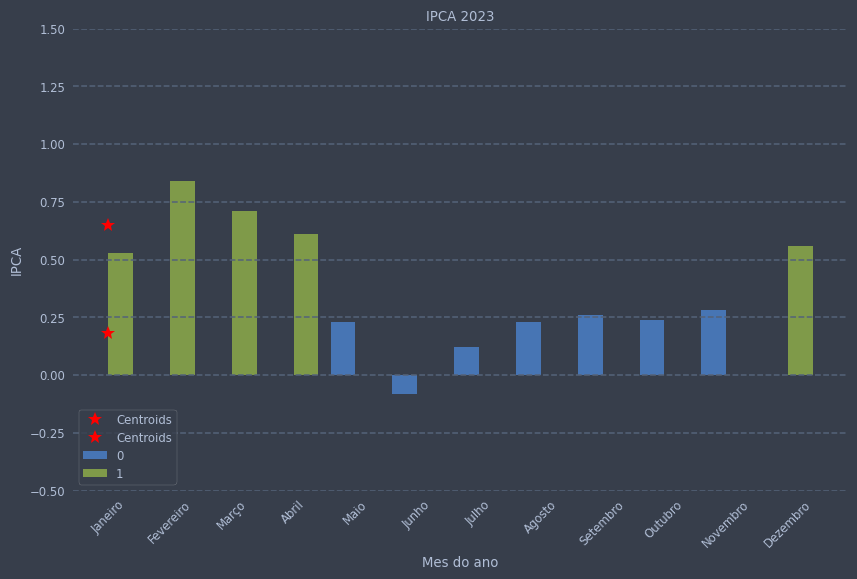

In [226]:
# Número de clusters definido pelo método Elbow
nCluster = 2

# Definindo parâmetros do KMeans
kmeans = KMeans(n_clusters=nCluster, random_state=0, n_init=10)

for cln in ipcaCluster:
    cls(wait=True)
    # Rodando o algoritmo K-means para cada gráfico
    kmeans.fit(ipcaCluster[[cln]])

    # Calculando os centróides dos clusters
    centroids = kmeans.cluster_centers_

    # Criando gráfico de barras com parâmetro "hue" com os resultados do KMeans
    plt.figure(figsize=(10, 6))
    barrasIpca = sb.barplot(data=dataIpcaMedio, x="Mes", y=cln, hue=kmeans.labels_)
    barrasIpca.set_title(f'IPCA {cln}')
    barrasIpca.set_xlabel("Mes do ano")
    barrasIpca.set_ylabel("IPCA")

    # Plotando os centróides dos clusters
    plt.plot(centroids.T, marker='*', markersize=10, linestyle='', color='red', label='Centroids')

    plt.xticks(rotation=45)
    plt.legend()
    plt.ylim(-0.5,1.5)
    # Plotando gráfico
    plt.show()
    time.sleep(1)